# NLP Project

## Download of the Dataset

In [1]:
from utils.seeder import set_random_seed
SEED = 42

set_random_seed(SEED)

c:\Users\riccardo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

In [3]:
def get_labels_list(row: pd.Series) -> pd.Series:
    return [index for index, value in row.items() if value == 1]

def get_dataframe(data_folder: str, df_type: str) -> pd.DataFrame:
    assert df_type in ['training', 'validation', 'test', 'validation-zhihu'], 'Specify the `df_type` as either training, validation or test'
    
    arguments_df = pd.read_csv(os.path.join(data_folder, f'arguments-{df_type}.tsv'), sep='\t', header=0)
    labels_df = pd.read_csv(os.path.join(data_folder, f'labels-{df_type}.tsv'), sep='\t', header=0)
    
    arguments_df['Labels'] = labels_df.apply(lambda x: get_labels_list(x), axis=1)
    
    arguments_df.drop('Argument ID', axis=1, inplace=True)
    labels_df.drop('Argument ID', axis=1, inplace=True)
    
    return arguments_df, labels_df

In [4]:
arguments_train_df, labels_train_df = get_dataframe('data', 'training')
arguments_test_df, labels_test_df = get_dataframe('data', 'validation')

In [5]:
print('Arguments dataframe structure:')
arguments_train_df.head()

Arguments dataframe structure:


,Conclusion,Stance,Premise,Labels
0,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,[Security: societal]
1,We should ban fast food,in favor of,fast food should be banned because it is reall...,[Security: personal]
2,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,We should ban factory farming,against,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [6]:
print('Labels dataframe structure:')
labels_train_df.head()

Labels dataframe structure:


,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [7]:
print(f'Number of rows of the train dataframe: {len(arguments_train_df)}')
print(f'Number of rows of the test dataframe: {len(arguments_test_df)}')

Number of rows of the train dataframe: 5393
Number of rows of the test dataframe: 1896


In [8]:
from sklearn.model_selection import train_test_split

arguments_train_df, arguments_val_df, labels_train_df, labels_val_df = train_test_split(
    arguments_train_df, labels_train_df, test_size=.33, random_state=SEED)

arguments_train_df.reset_index(drop=True, inplace=True)
labels_train_df.reset_index(drop=True, inplace=True)
arguments_val_df.reset_index(drop=True, inplace=True)
labels_val_df.reset_index(drop=True, inplace=True)

In [9]:
print(f'Number of rows of the train dataframe after splitting: {len(arguments_train_df)}')
print(f'Number of rows of the validation dataframe after splitting: {len(arguments_val_df)}')

Number of rows of the train dataframe after splitting: 3613
Number of rows of the validation dataframe after splitting: 1780


In [10]:
import matplotlib.pyplot as plt 

def plot_stance_distribution(arguments_df: pd.DataFrame, title: str = 'Stance distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    arguments_df.Stance.value_counts().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle(title)

    ax.set_xlabel('stance')
    ax.set_ylabel('count')

    plt.tight_layout()


    plt.show()

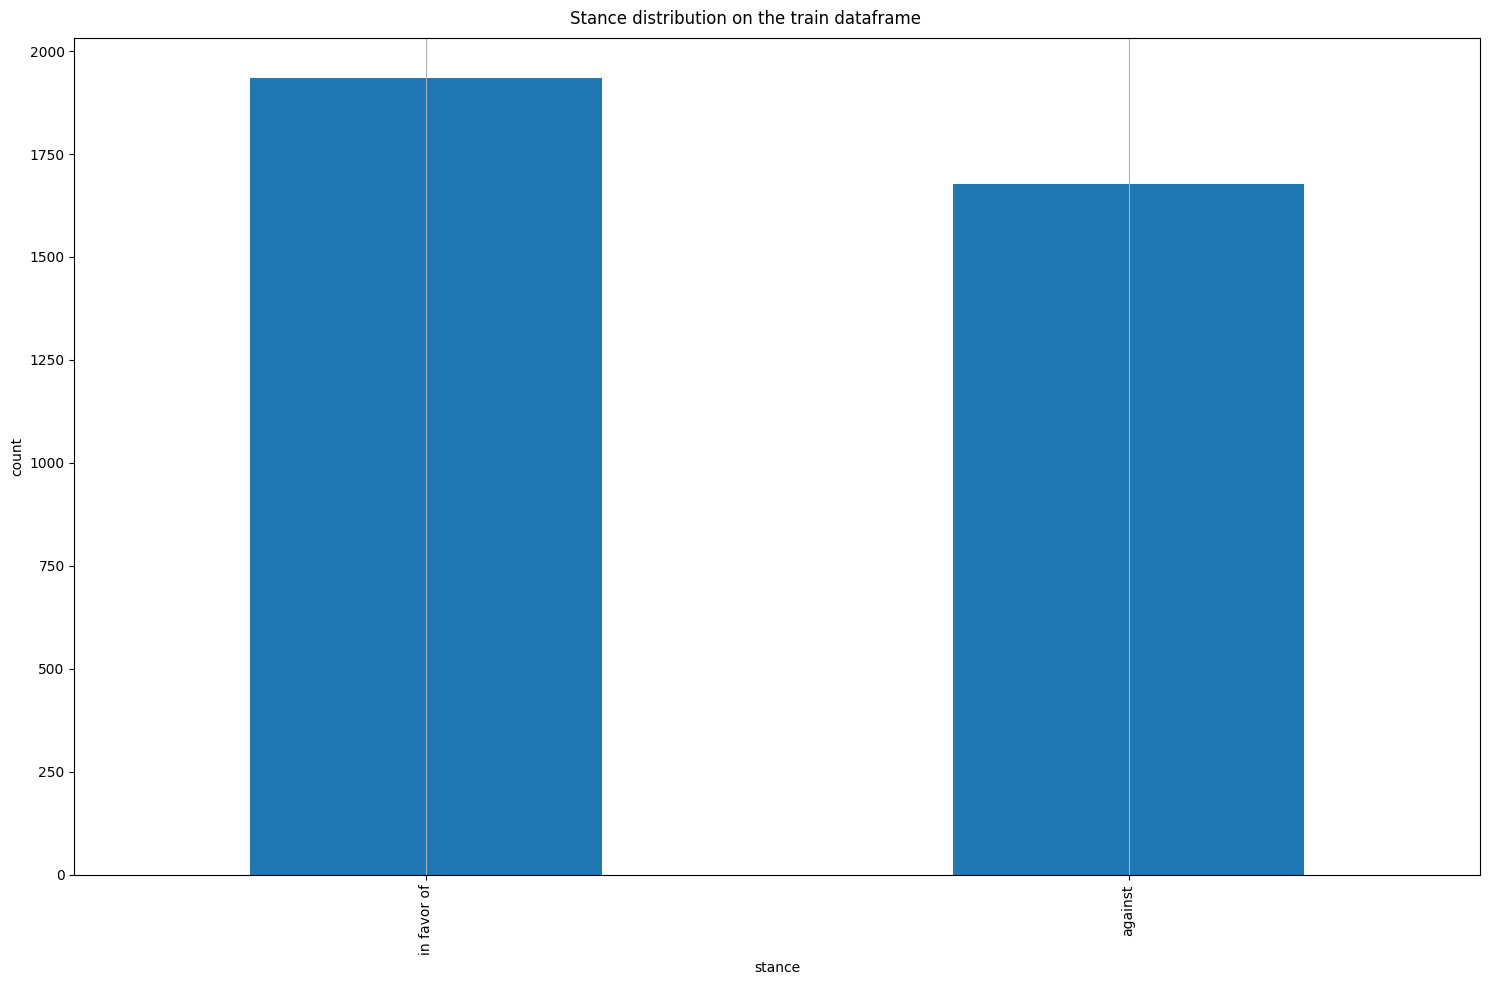

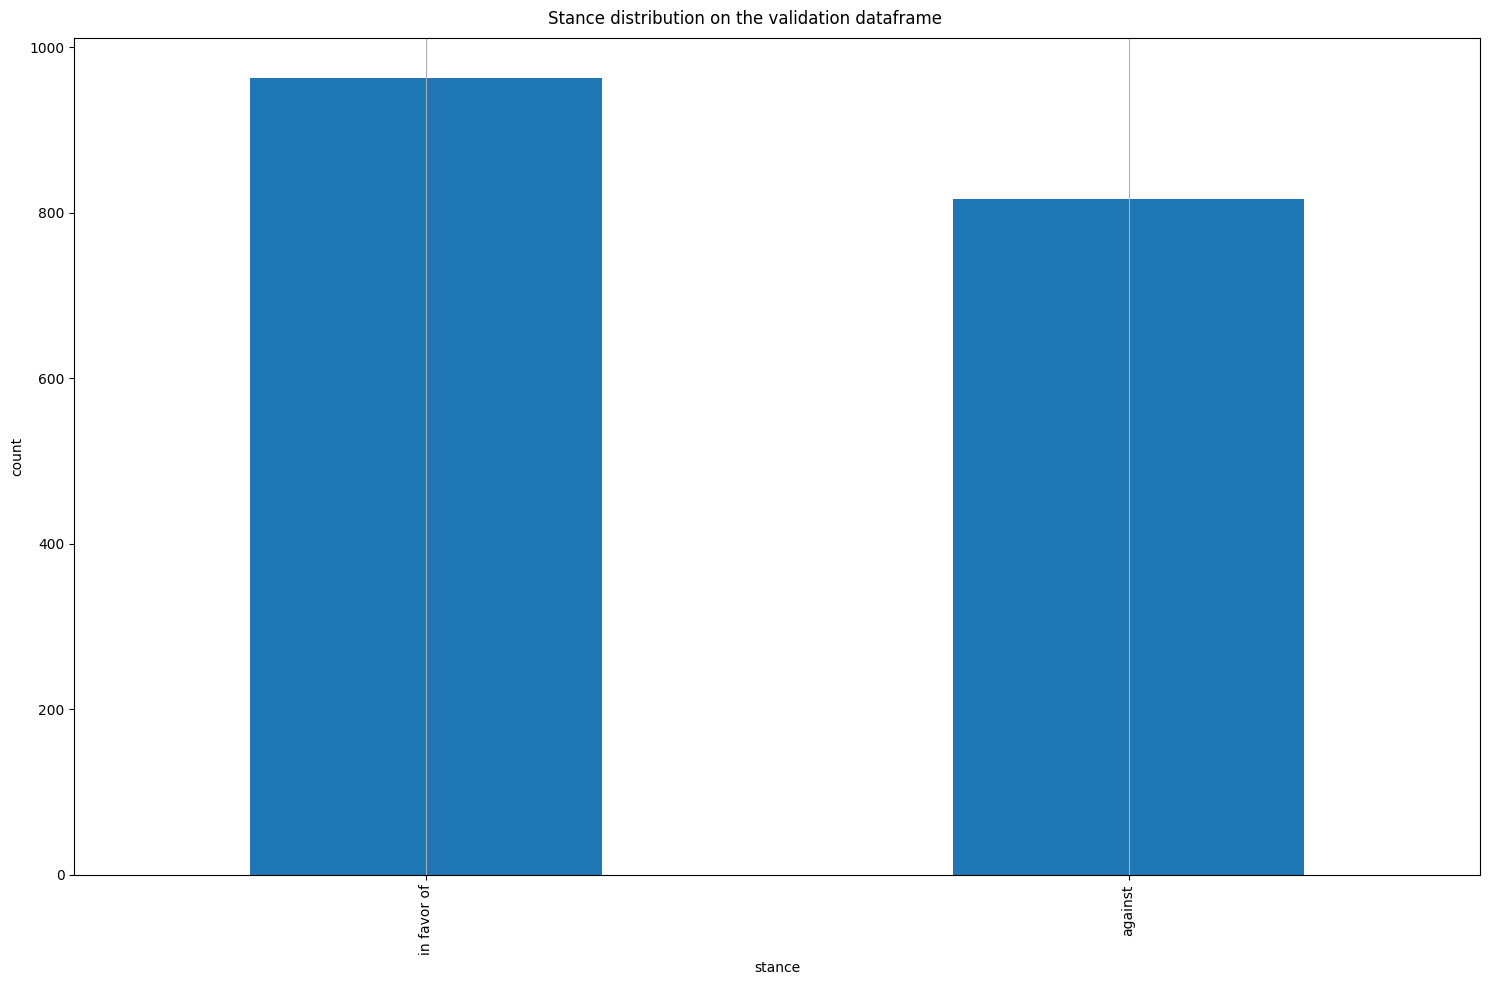

In [11]:
plot_stance_distribution(arguments_train_df, title='Stance distribution on the train dataframe')
plot_stance_distribution(arguments_val_df, title='Stance distribution on the validation dataframe')

In [12]:
import matplotlib.pyplot as plt 

def plot_sentiment_distribution(labels_df: pd.DataFrame, title: str = 'Sentiment values distribution'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 10))
    labels_train_df.sum().plot(ax=ax, kind='bar')


    # Show just the x grid
    ax.grid(axis='x')

    # set title and axis labels
    plt.suptitle('Sentiment values distribution')

    ax.set_xlabel('sentiment values')
    ax.set_ylabel('count')

    plt.tight_layout()

    plt.show()

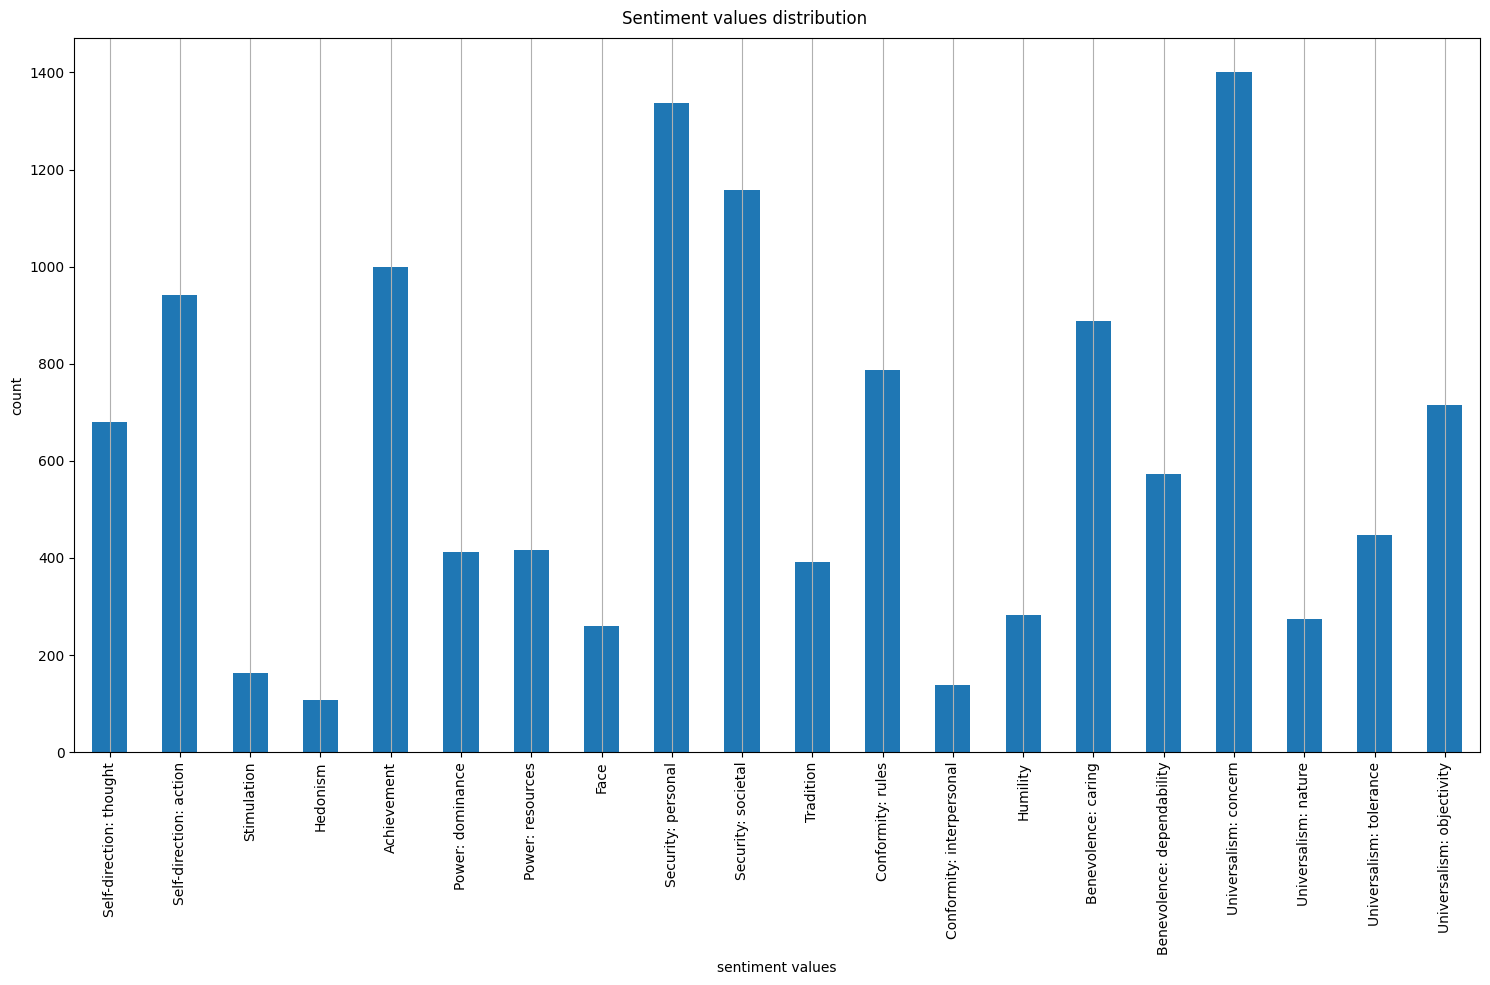

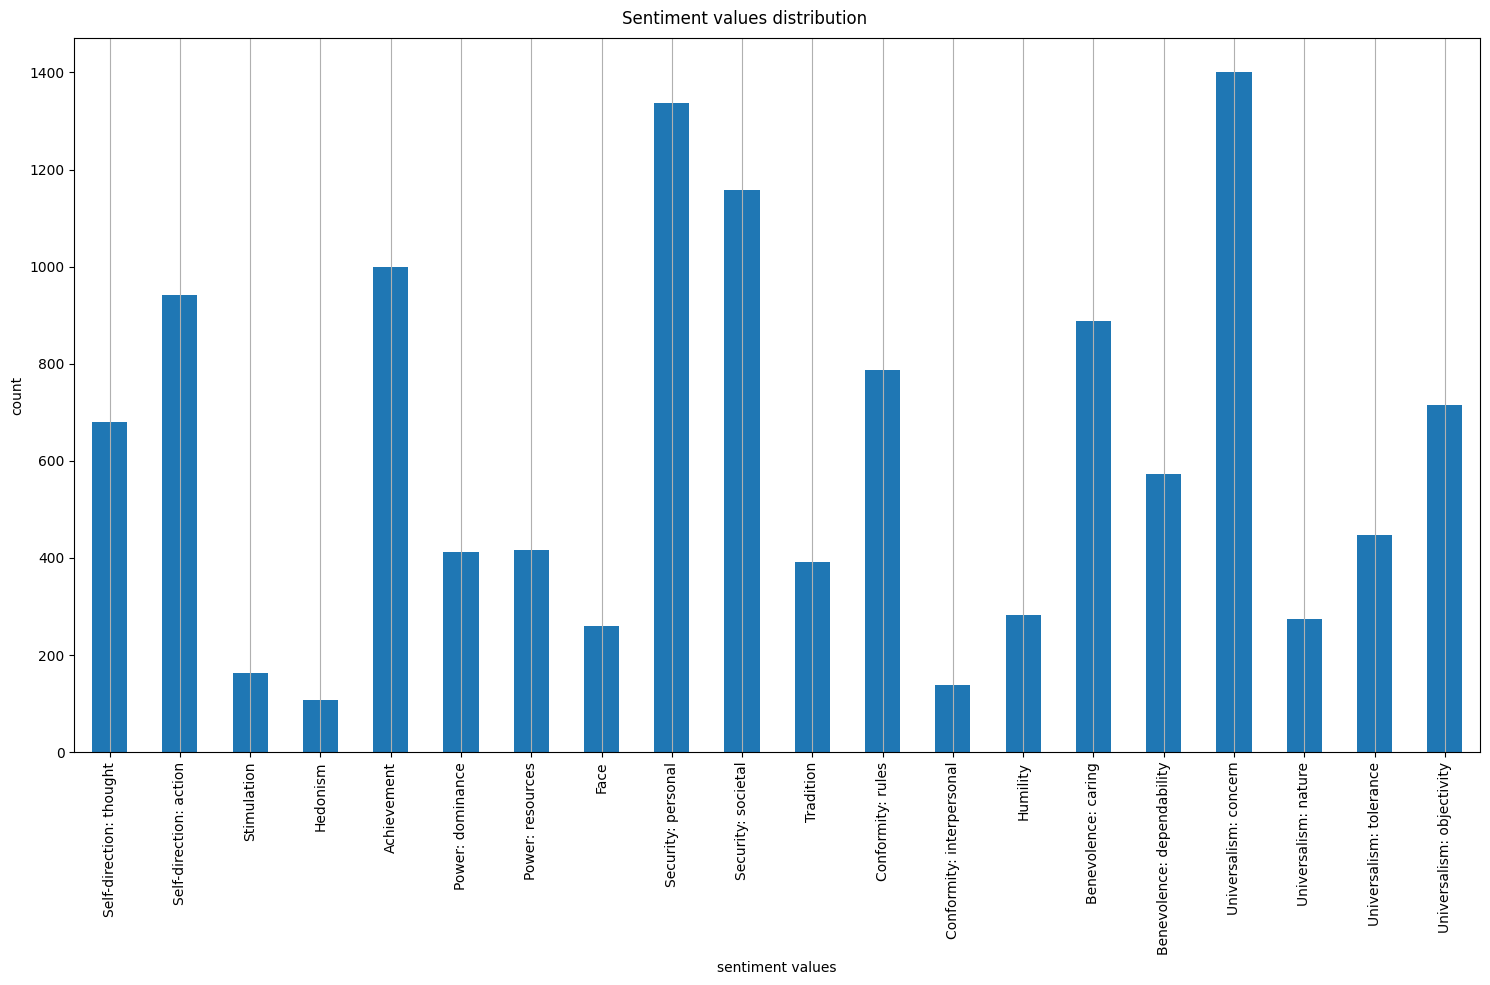

In [13]:
plot_sentiment_distribution(labels_train_df, title='Sentiment values distribution on the train dataframe')
plot_sentiment_distribution(labels_val_df, title='Sentiment values distribution on the validation dataframe')

In [14]:
import numpy as np

def plot_sequence_length_analysis(arguments_df: pd.DataFrame, df_name: str = 'dataset'):
    """Analyse the length of the premises + stances + conclusions
    Parameters
    ----------
    df : DataFrame
        A pandas dataframe.
    """
    # Length of each training sentence
    train_sentences_lenghts = arguments_df.Premise.str.len() + arguments_df.Conclusion.str.len() + 1

    # Histogram of the sentences length distribution
    hist, bin_edges = np.histogram(train_sentences_lenghts, bins=np.max(train_sentences_lenghts) + 1, density=True) 
    # Cumulative distribution of the sentences length
    C = np.cumsum(hist)*(bin_edges[1] - bin_edges[0])

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(bin_edges[1:], hist)
    plt.title(f'Distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(bin_edges[1:], C)
    plt.title(f'Comulative distribution of the sentence length across the {df_name}')
    plt.xlabel('Sentence length')
    plt.grid()
    plt.show()

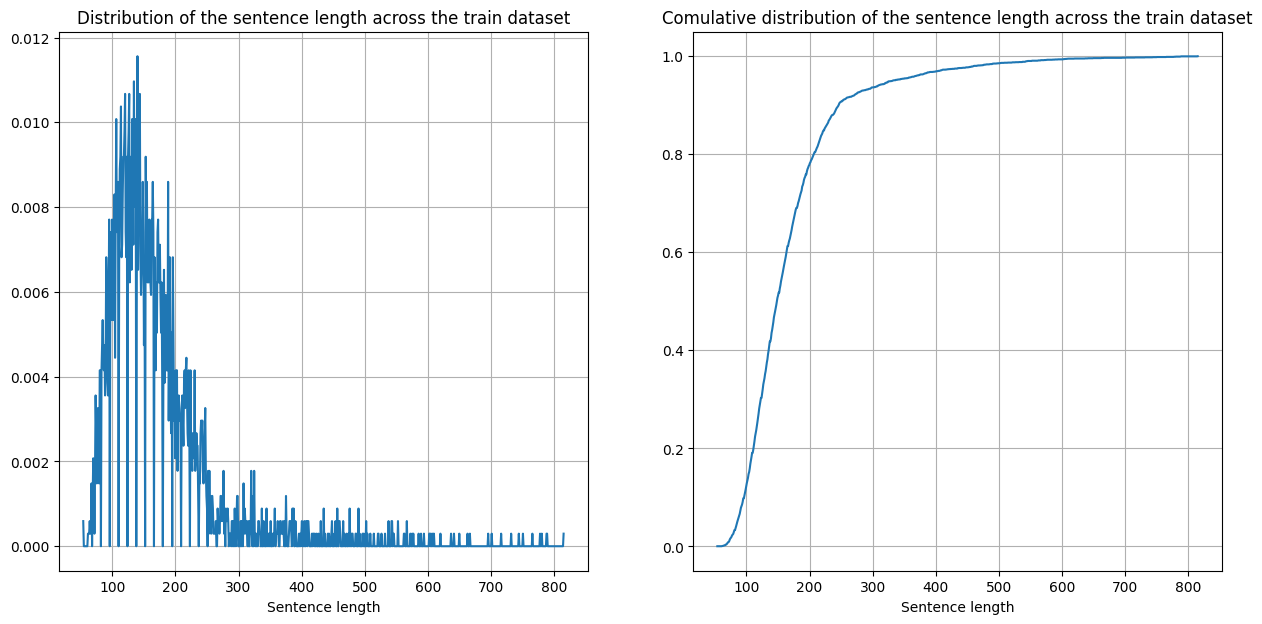

In [15]:
plot_sequence_length_analysis(arguments_train_df, df_name='train dataset')

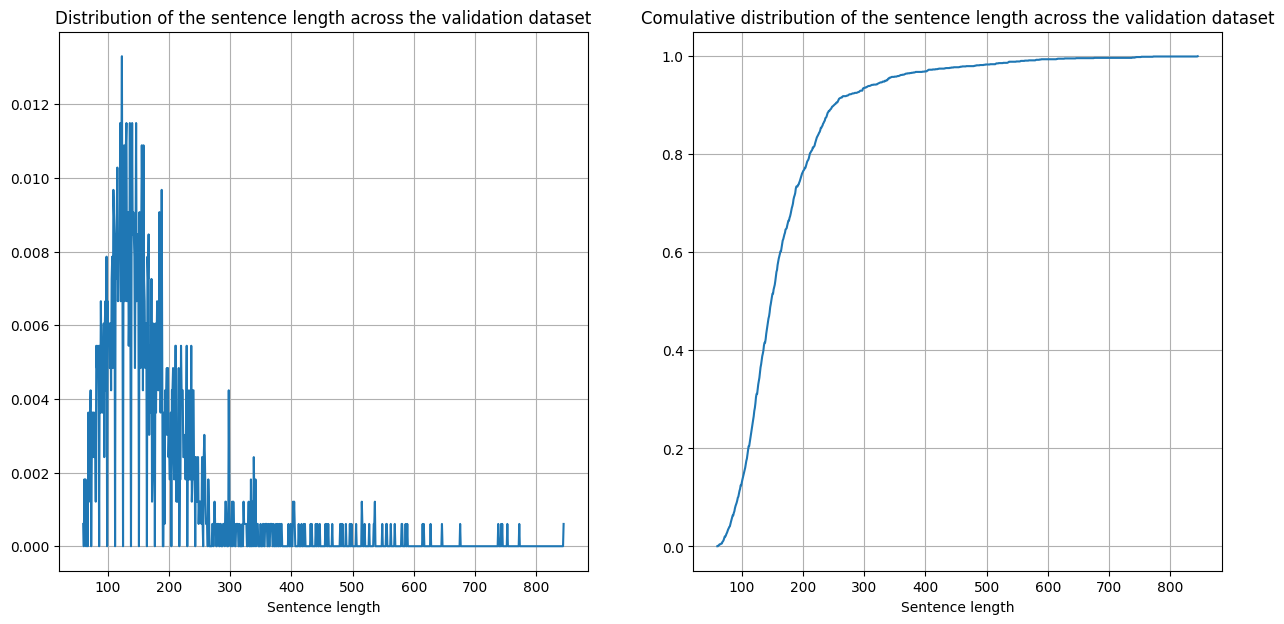

In [16]:
plot_sequence_length_analysis(arguments_val_df, df_name='validation dataset')

In [17]:
quantile_95 = (arguments_train_df.Premise.str.len() + arguments_train_df.Conclusion.str.len() + 1).quantile(.95, interpolation='nearest')

print(f'The 95th quantile of input lengths in the train dataset is: {quantile_95}')

The 95th quantile of input lengths in the train dataset is: 331


In [18]:
total_corpus = arguments_train_df.Conclusion.tolist() + arguments_train_df.Premise.tolist()

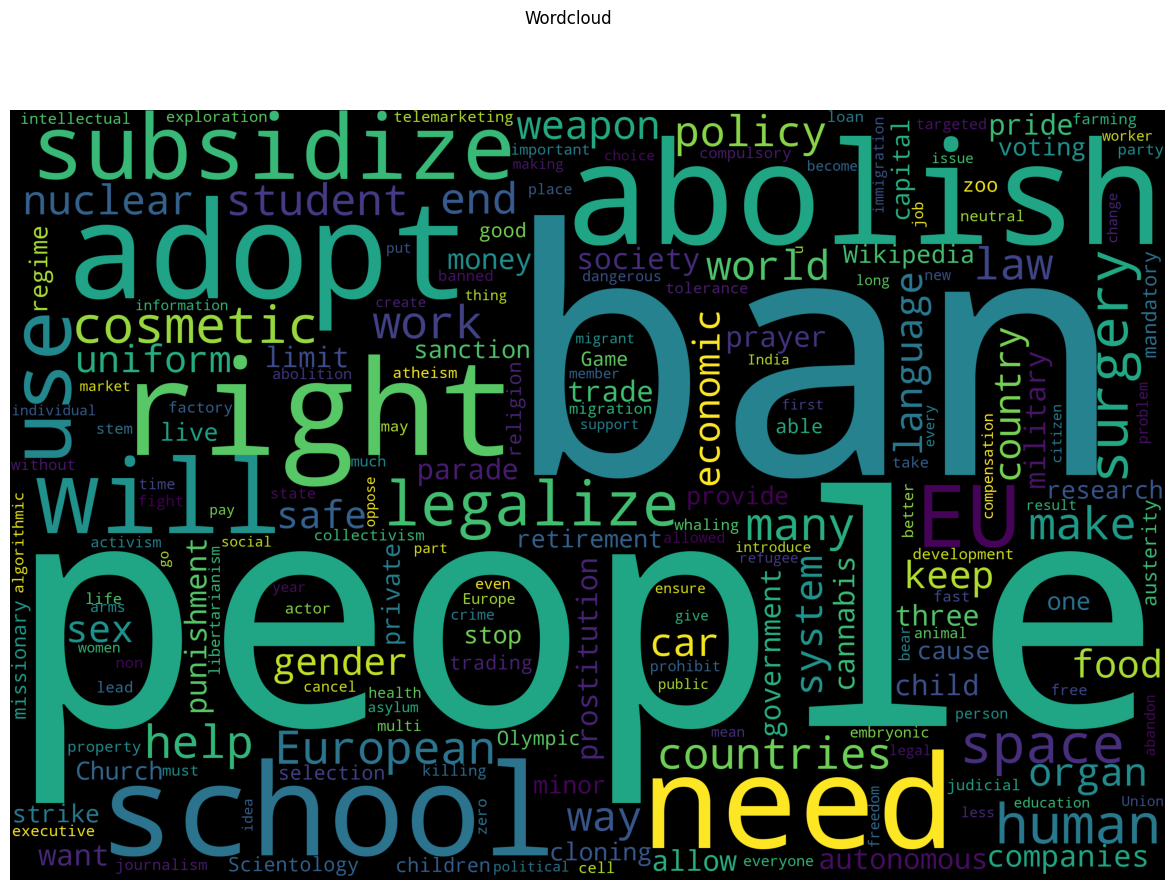

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=3000, height=2000, collocations=False, stopwords=STOPWORDS).generate(' '.join(total_corpus))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud)
plt.suptitle('Wordcloud') 
plt.axis("off")
plt.show()

In [20]:
# Importing the libraries needed
import pandas as pd
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer

In [21]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [22]:
len(labels_train_df.columns.to_list())

20

In [23]:
#label_to_number_dict = {l: i for i, l in enumerate(labels_train_df.columns.to_list()[1:])}
#number_to_label_dict = {i: l for l, i in label_to_number_dict.items()}

In [24]:
#model_name = 'distilbert-base-cased'
model_name = 'distilroberta-base'

In [25]:
from transformers import AutoTokenizer

# Defining some key variables that will be used later on in the training
MAX_LEN = quantile_95
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 2
EPOCHS = 3
LEARNING_RATE_BASE = 1e-05
LEARNING_RATE_HEAD = 1e-03
tokenizer = AutoTokenizer.from_pretrained(model_name, problem_type="multi_label_classification")


num_added_toks = tokenizer.add_tokens(['[FAV]', '[AGN]'], special_tokens=True) ##This line is updated

stance_encoder = {'in favor of': '[FAV]', 'against': '[AGN]'}

###The tokenizer has to be saved if it has to be reused
#tokenizer.save_pretrained(<output_dir>)

In [26]:
# Change from dataframe to numpy

class Triage(Dataset):
    def __init__(self, arguments_df: pd.DataFrame, labels_df: pd.DataFrame, tokenizer, max_len):
        self.len = len(arguments_df)
        self.arguments_data = arguments_df
        self.labels_data = labels_df
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        premise = self.arguments_data.Premise[index]
        conclusion = self.arguments_data.Conclusion[index]
        stance = stance_encoder[self.arguments_data.Stance[index]]
        
        input_text = premise + f' {stance} ' + conclusion
        
        inputs = self.tokenizer.encode_plus(
            input_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=False,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'labels': torch.tensor(self.labels_data.loc[index].to_list(), dtype=torch.long)
        } 
    
    def __len__(self):
        return self.len

In [27]:
# Creating the dataset and dataloader for the neural network
train_set = Triage(arguments_train_df, labels_train_df, tokenizer, MAX_LEN)
val_set = Triage(arguments_test_df, labels_test_df, tokenizer, MAX_LEN)

In [28]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(train_set, **train_params)
testing_loader = DataLoader(val_set, **test_params)

In [29]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
'''
class DistillBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistillBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output'''

'\nclass DistillBERTClass(torch.nn.Module):\n    def __init__(self):\n        super(DistillBERTClass, self).__init__()\n        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")\n        self.pre_classifier = torch.nn.Linear(768, 768)\n        self.dropout = torch.nn.Dropout(0.3)\n        self.classifier = torch.nn.Linear(768, len(labels_train_df.columns) - 1)\n\n    def forward(self, input_ids, attention_mask):\n        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)\n        hidden_state = output_1[0]\n        pooler = hidden_state[:, 0]\n        pooler = self.pre_classifier(pooler)\n        pooler = torch.nn.ReLU()(pooler)\n        pooler = self.dropout(pooler)\n        output = self.classifier(pooler)\n        return output'

In [30]:
from transformers import AutoModelForSequenceClassification


model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(labels_train_df.columns),
    ignore_mismatched_sizes=True,
    problem_type="multi_label_classification")

model.resize_token_embeddings(len(tokenizer))

model.to(device)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight'

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [31]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50267, 768)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs,  targets.float())
        loss = self.alpha * (1 - torch.exp(-bce_loss)) ** self.gamma * bce_loss
        return loss

In [33]:

# Creating the loss function and optimizer
#loss_function = torch.nn.BCEWithLogitsLoss()
loss_function = FocalLoss()
optimizer = torch.optim.Adam(params=[
                {'params': model.roberta.parameters(), 'lr': LEARNING_RATE_BASE},
                {'params': model.classifier.parameters(), 'lr': LEARNING_RATE_HEAD}
            ])

In [34]:
# Function to calcuate the accuracy of the model

def calculate_accuracy(out, targets, threshold=.5):
    out = out.sigmoid()
    return ((out > threshold) == targets.bool()).float().mean().item()

In [37]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0

    for i, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['labels'].to(device, dtype = torch.float32)
       
        outputs = model(ids, mask)
        
        loss = loss_function(outputs.logits, targets)
        tr_loss += loss.item()

        n_correct += calculate_accuracy(outputs.logits, targets)

        nb_tr_steps += 1
        
        if i % 5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct * 100)/nb_tr_steps 
            print(f'Training Loss per 5000 steps: {loss_step}')
            print(f'Training Accuracy per 5000 steps: {accu_step}')

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct * 100) / nb_tr_steps}')
    epoch_loss = tr_loss / nb_tr_steps
    epoch_accu = (n_correct * 100) / nb_tr_steps
    print(f"Training Loss Epoch {epoch}: {epoch_loss}")
    print(f"Training Accuracy Epoch {epoch}: {epoch_accu}")

    return 
     

In [38]:
for epoch in range(EPOCHS):
    model.train()
    train(epoch)

Training Loss per 5000 steps: 0.07613591849803925
Training Accuracy per 5000 steps: 75.0
The Total Accuracy for Epoch 0: 85.33600771849135
Training Loss Epoch 0: 0.03387699492555936
Training Accuracy Epoch 0: 85.33600771849135
Training Loss per 5000 steps: 0.026052458211779594
Training Accuracy per 5000 steps: 86.2500011920929
The Total Accuracy for Epoch 1: 86.86670475697096
Training Loss Epoch 1: 0.025438686419150636
Training Accuracy Epoch 1: 86.86670475697096
Training Loss per 5000 steps: 0.008235746994614601
Training Accuracy per 5000 steps: 90.00000357627869
The Total Accuracy for Epoch 2: 87.96183753066359
Training Loss Epoch 2: 0.02037285606194477
Training Accuracy Epoch 2: 87.96183753066359


In [32]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            #big_val, big_idx = torch.max(outputs.data, dim=1)
            #n_correct += calcuate_accu(big_idx, targets)
            
            # If no value is over threshold get maximum
            out = outputs.data >= .5
            #indices = out.nonzero()
            
            #big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calculate_accuracy(out, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    
    return epoch_accu

In [33]:
print('This is the validation section to print the accuracy and see how it performs')
print('Here we are leveraging on the dataloader crearted for the validation dataset, the approcah is using more of pytorch')

acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

This is the validation section to print the accuracy and see how it performs
Here we are leveraging on the dataloader crearted for the validation dataset, the approcah is using more of pytorch


KeyError: 'targets'